# Lab 6

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it. 

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16). 
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [38]:
import random

class Card:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']

    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"


class Deck:
    def __init__(self, num_decks=1):
        self.num_decks = num_decks
        self.cards = self._create_deck()
        self.plastic_card_placed = False

    def _create_deck(self):
        """Create and shuffle a deck of cards (or multiple decks)."""
        deck = [Card(rank, suit) for rank in ranks for suit in suits] * self.num_decks
        random.shuffle(deck)
        return deck

    def shuffle(self):
        """Shuffle the deck."""
        self.cards = self._create_deck()
        random.shuffle(self.cards)

    def draw_card(self):
        """Draw a card from the deck, reshuffle if deck is empty or plastic card is hit."""
        if not self.cards:  # Deck is empty
            self.shuffle()  # Automatically reshuffle if empty
        card = self.cards.pop(0)  # Draw the top card

        # If the plastic card is drawn, shuffle the deck
        if isinstance(card, PlasticCard):
            print("Plastic card drawn! Reshuffling the deck...")
            self.shuffle()
            card = self.cards.pop(0)  # Draw a new card after reshuffling

        return card


2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook. 

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [25]:
import random

# Assuming Card and Deck classes are already defined as before

class Hand:
    """Represents a player's or dealer's hand in Blackjack."""
    def __init__(self):
        self.cards = []
        self.value = 0
        self.aces = 0  # To track the number of aces for value adjustment
    
    def add_card(self, card):
        """Add a card to the hand and adjust the value."""
        self.cards.append(card)
        rank = card.rank
        
        if rank.isdigit():  # 2-10 are worth their face value
            self.value += int(rank)
        elif rank in ['Jack', 'Queen', 'King']:  # Face cards are worth 10
            self.value += 10
        elif rank == 'Ace':  # Aces are worth 11 or 1
            self.value += 11
            self.aces += 1

        self.adjust_for_ace()

    def adjust_for_ace(self):
        """Adjust value if there are aces and the total value is over 21."""
        while self.value > 21 and self.aces:
            self.value -= 10  # Count the ace as 1 instead of 11
            self.aces -= 1

    def is_blackjack(self):
        """Check if the hand is a blackjack (21 with two cards)."""
        return self.value == 21 and len(self.cards) == 2

    def __repr__(self):
        return f"Hand: {', '.join(map(str, self.cards))} | Value: {self.value}"


class BlackjackGame:
    """The main Blackjack game class."""
    def __init__(self, num_decks=1, starting_chips=100, bet_amount=10):
        self.deck = Deck(num_decks)
        self.deck.shuffle()

        self.player_hand = Hand()
        self.dealer_hand = Hand()

        self.player_chips = starting_chips
        self.bet_amount = bet_amount

    def deal_initial_cards(self):
        """Deal two cards to both the player and the dealer."""
        for _ in range(2):
            self.player_hand.add_card(self.deck.draw_card())
            self.dealer_hand.add_card(self.deck.draw_card())

    def show_hands(self, reveal_dealer=False):
        """Display the hands of the player and the dealer."""
        print(f"Player's hand: {self.player_hand}")
        if reveal_dealer:
            print(f"Dealer's hand: {self.dealer_hand}")
        else:
            print(f"Dealer's hand: [{self.dealer_hand.cards[0]}, Hidden]")

    def check_dealer_blackjack(self):
        """Check if the dealer has an opening blackjack."""
        if self.dealer_hand.is_blackjack():
            print("Dealer has blackjack!")
            if self.player_hand.is_blackjack():
                print("Player also has blackjack! It's a tie.")
                return "tie"
            else:
                return "dealer_blackjack"
        return None

    def player_turn(self):
        """Handle the player's turn: Hit or Stand."""
        while True:
            self.show_hands()
            if self.player_hand.value >= 21:
                break

            move = input("Do you want to hit or stand? (h/s): ").lower()
            if move == 'h':
                self.player_hand.add_card(self.deck.draw_card())
                if self.player_hand.value > 21:
                    print("Player busts!")
                    break
            elif move == 's':
                print("Player stands.")
                break
            else:
                print("Invalid input. Please choose 'h' for hit or 's' for stand.")

    def dealer_turn(self):
        """Handle the dealer's turn."""
        print("Dealer's turn.")
        self.show_hands(reveal_dealer=True)
        while self.dealer_hand.value < 17:
            self.dealer_hand.add_card(self.deck.draw_card())
            print(f"Dealer hits: {self.dealer_hand}")
            if self.dealer_hand.value > 21:
                print("Dealer busts!")
                break

    def check_winner(self):
        """Check the winner between player and dealer and adjust chips."""
        player_val = self.player_hand.value
        dealer_val = self.dealer_hand.value

        if player_val > 21:
            self.player_chips -= self.bet_amount
            return "Dealer wins, player busted!"
        elif dealer_val > 21:
            self.player_chips += self.bet_amount
            return "Player wins, dealer busted!"
        elif player_val > dealer_val:
            self.player_chips += self.bet_amount
            return "Player wins!"
        elif player_val < dealer_val:
            self.player_chips -= self.bet_amount
            return "Dealer wins!"
        else:
            return "It's a tie!"

    def play(self):
        """Start the Blackjack game."""
        print("Welcome to Blackjack!")
        print(f"Starting chips: {self.player_chips}")

        while self.player_chips >= self.bet_amount:
            self.player_hand = Hand()
            self.dealer_hand = Hand()

            self.deck.shuffle()  # Optionally shuffle the deck before each new game

            print(f"\nNew round! Betting {self.bet_amount} chips.")
            self.deal_initial_cards()

            # Check for dealer's opening blackjack
            dealer_blackjack_status = self.check_dealer_blackjack()
            if dealer_blackjack_status == "dealer_blackjack":
                self.player_chips -= self.bet_amount
                print(f"Player chips: {self.player_chips}")
                if self.player_chips < self.bet_amount:
                    print("You're out of chips! Game over.")
                    break
                continue
            elif dealer_blackjack_status == "tie":
                print("It's a push. No chips are lost or won.")
                print(f"Player chips: {self.player_chips}")
                if self.player_chips < self.bet_amount:
                    print("You're out of chips! Game over.")
                    break
                continue

            # Player's turn
            self.player_turn()

            if self.player_hand.value <= 21:
                self.dealer_turn()

            result = self.check_winner()
            print(result)
            print(f"Player chips: {self.player_chips}")

            if self.player_chips < self.bet_amount:
                print("You're out of chips! Game over.")
                break

            play_again = input("\nDo you want to play another round? (y/n): ").lower()
            if play_again != 'y':
                break

        print("Thank you for playing! Final chip count:", self.player_chips)


# Example usage
if __name__ == "__main__":
    game = BlackjackGame(num_decks=1)  # Create a blackjack game with one deck
    game.play()


Deck shuffled.
Welcome to Blackjack!
Starting chips: 100
Deck shuffled.

New round! Betting 10 chips.
Player's hand: Hand: 4 of Clubs, Ace of Spades | Value: 15
Dealer's hand: [8 of Hearts, Hidden]


Do you want to hit or stand? (h/s):  h


Player's hand: Hand: 4 of Clubs, Ace of Spades, 5 of Spades | Value: 20
Dealer's hand: [8 of Hearts, Hidden]


Do you want to hit or stand? (h/s):  s


Player stands.
Dealer's turn.
Player's hand: Hand: 4 of Clubs, Ace of Spades, 5 of Spades | Value: 20
Dealer's hand: Hand: 8 of Hearts, 10 of Clubs | Value: 18
Player wins!
Player chips: 110



Do you want to play another round? (y/n):  n


Thank you for playing! Final chip count: 110


5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [32]:
if __name__ == "__main__":
    game = BlackjackGame(num_decks=1)  # Create a blackjack game with one deck
    game.play()

Deck shuffled.
Welcome to Multi-Dealer Blackjack!
Starting chips: 100

Round 1 - Betting 10 chips.
Deck shuffled.
Player's hand: Hand: King of Clubs, 2 of Hearts | Value: 12
Dealer 1's hand: [3 of Hearts, Hidden]


Do you want to hit or stand? (h/s):  h


Player's hand: Hand: King of Clubs, 2 of Hearts, 7 of Clubs | Value: 19
Dealer 1's hand: [3 of Hearts, Hidden]


Do you want to hit or stand? (h/s):  s


Player stands.

Dealer 1's turn:
Dealer's turn.
Dealer hits: Hand: 3 of Hearts, 6 of Hearts, Jack of Hearts | Value: 19
Result against Dealer 1: It's a tie!
Player chips after Dealer 1: 100



Do you want to play another round? (y/n):  n


Thank you for playing! Final chip count: 100


6. Implement a new player with the following strategy:

    * Assign each card a value: 
        * Cards 2 to 6 are +1 
        * Cards 7 to 9 are 0 
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [46]:
class CountingPlayer:
    """Player with a strategy that counts cards and hits/stays based on the count."""
    def __init__(self, threshold=-2):
        self.card_count = 0  # Tracks the sum of card values seen so far
        self.threshold = threshold  # Threshold to decide whether to hit or stay
    
    def update_count(self, card):
        """Update the card count based on the card's rank."""
        if card is None:
            return  # Safeguard: if the card is None, skip updating the count
        rank = card.rank
        if rank in ['2', '3', '4', '5', '6']:
            self.card_count += 1
        elif rank in ['10', 'Jack', 'Queen', 'King', 'Ace']:
            self.card_count -= 1

    def make_decision(self, player_hand_value):
        """Make a hit or stay decision based on the current card count."""
        if player_hand_value >= 21:
            return 's'  # Automatically stay if the hand is 21 or above
        
        # If the count is very negative, we hit. Otherwise, we stay.
        if self.card_count <= self.threshold:
            return 'h'
        else:
            return 's'
class BlackjackGameWithCounter(BlackjackGame):
    """A Blackjack game that uses the CountingPlayer strategy."""
    def __init__(self, num_decks=1, num_dealers=1, starting_chips=100, bet_amount=10, counter_threshold=-2):
        super().__init__(num_decks, num_dealers, starting_chips, bet_amount)
        self.counting_player = CountingPlayer(threshold=counter_threshold)  # Pass the counter threshold here

    def player_turn(self):
        """Handle the player's turn with card counting strategy."""
        while True:
            self.show_hands()
            
            # Update the player's card count based on their cards
            for card in self.player_hand.cards:
                self.counting_player.update_count(card)
            
            # Make decision based on count
            decision = self.counting_player.make_decision(self.player_hand.value)
            print(f"Player decides to {'hit' if decision == 'h' else 'stay'} based on the count of {self.counting_player.card_count}.")

            if decision == 'h':
                self.player_hand.add_card(self.deck.draw_card())
                # Update the count for the new card
                self.counting_player.update_count(self.player_hand.cards[-1])
                if self.player_hand.value > 21:
                    print("Player busts!")
                    break
            elif decision == 's':
                print("Player stands.")
                break

if __name__ == "__main__":
    game = BlackjackGameWithCounter(num_decks=4, num_dealers=3, counter_threshold=-2)  # Create a game with counting player
    game.play(rounds=5)  # Play 5 rounds



Round 1
Player's hand: ['5 of Spades', '3 of Spades'] Value: 8
Dealer 1's hand: ['5 of Clubs', 'Ace of Diamonds'] Value: 16
Dealer 2's hand: ['Queen of Hearts', '8 of Diamonds'] Value: 18
Dealer 3's hand: ['7 of Hearts', '5 of Diamonds'] Value: 12
Player decides to stay based on the count of 2.
Player stands.
Player's hand: ['5 of Spades', '3 of Spades'] Value: 8
Dealer 1's hand: ['5 of Clubs', 'Ace of Diamonds', '6 of Clubs', 'Ace of Hearts', '6 of Hearts'] Value: 19
Dealer 2's hand: ['Queen of Hearts', '8 of Diamonds'] Value: 18
Dealer 3's hand: ['7 of Hearts', '5 of Diamonds', '2 of Spades', 'Queen of Clubs'] Value: 24

Round 2
Player's hand: ['9 of Clubs', 'Jack of Diamonds'] Value: 19
Dealer 1's hand: ['Queen of Spades', '9 of Spades'] Value: 19
Dealer 2's hand: ['5 of Spades', 'Jack of Diamonds'] Value: 15
Dealer 3's hand: ['Ace of Clubs', '9 of Diamonds'] Value: 20
Player decides to stay based on the count of 1.
Player stands.
Player's hand: ['9 of Clubs', 'Jack of Diamonds'] Va

#### 7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [54]:
class Card:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']

    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit

    def __repr__(self):
        return f"{self.rank} of {self.suit}"


class Hand:
    """Represents a player's hand."""
    def __init__(self):
        self.cards = []

    @property
    def value(self):
        """Calculate and return the value of the hand."""
        value = 0
        aces = 0
        for card in self.cards:
            if card.rank in ['Jack', 'Queen', 'King']:
                value += 10
            elif card.rank == 'Ace':
                aces += 1
                value += 11  # Initially count Ace as 11
            else:
                value += int(card.rank)

        # Adjust Ace values if necessary
        while value > 21 and aces:
            value -= 10  # Count Ace as 1 instead of 11
            aces -= 1

        return value

    def add_card(self, card):
        """Add a card to the hand."""
        self.cards.append(card)

    def clear(self):
        """Clear the hand for a new round."""
        self.cards.clear()


class Deck:
    def __init__(self, num_decks=1):
        self.num_decks = num_decks
        self.cards = self._create_deck()
        self.plastic_card_placed = False

    def _create_deck(self):
        """Create and shuffle a deck of cards (or multiple decks)."""
        deck = [Card(rank, suit) for rank in Card.ranks for suit in Card.suits] * self.num_decks
        random.shuffle(deck)
        return deck

    def shuffle(self):
        """Shuffle the deck."""
        self.cards = self._create_deck()
        random.shuffle(self.cards)

    def draw_card(self):
        """Draw a card from the deck, reshuffle if deck is empty or plastic card is hit."""
        if not self.cards:  # Deck is empty
            self.shuffle()  # Automatically reshuffle if empty
        card = self.cards.pop(0)  # Draw the top card

        # If the plastic card is drawn, shuffle the deck
        if isinstance(card, PlasticCard):
            print("Plastic card drawn! Reshuffling the deck...")
            self.shuffle()
            card = self.cards.pop(0)  # Draw a new card after reshuffling

        return card


class CountingPlayer:
    """Player with a strategy that counts cards and hits/stays based on the count."""
    def __init__(self, threshold=-2):
        self.card_count = 0  # Tracks the sum of card values seen so far
        self.threshold = threshold  # Threshold to decide whether to hit or stay

    def update_count(self, card):
        """Update the card count based on the card's rank."""
        if card is None:
            return  # Safeguard: if the card is None, skip updating the count
        rank = card.rank
        if rank in ['2', '3', '4', '5', '6']:
            self.card_count += 1
        elif rank in ['10', 'Jack', 'Queen', 'King', 'Ace']:
            self.card_count -= 1

    def make_decision(self, player_hand_value):
        """Make a hit or stay decision based on the current card count."""
        if player_hand_value >= 21:
            return 's'  # Automatically stay if the hand is 21 or above

        # If the count is very negative, we hit. Otherwise, we stay.
        if self.card_count <= self.threshold:
            return 'h'
        else:
            return 's'


class BlackjackGame:
    """Base class for a Blackjack game."""
    def __init__(self, num_decks=1, num_dealers=1, starting_chips=100, bet_amount=10):
        self.deck = Deck(num_decks)
        self.player_hand = Hand()
        self.dealer_hands = [Hand() for _ in range(num_dealers)]
        self.player_chips = starting_chips
        self.bet_amount = bet_amount

    def deal_initial_cards(self):
        """Deal two cards to player and dealer hands."""
        self.player_hand.add_card(self.deck.draw_card())
        self.player_hand.add_card(self.deck.draw_card())
        for dealer_hand in self.dealer_hands:
            dealer_hand.add_card(self.deck.draw_card())
            dealer_hand.add_card(self.deck.draw_card())

    def show_hands(self):
        """Show the current hands of player and dealer(s)."""
        print("Player's hand:", [str(card) for card in self.player_hand.cards], "Value:", self.player_hand.value)
        for i, dealer_hand in enumerate(self.dealer_hands):
            print(f"Dealer {i + 1}'s hand:", [str(card) for card in dealer_hand.cards], "Value:", dealer_hand.value)

    def dealer_turn(self, dealer_hand):
        """Simulate the dealer's turn, where they hit until 17 or more."""
        while dealer_hand.value < 17:
            dealer_hand.add_card(self.deck.draw_card())


class BlackjackGameWithCounter(BlackjackGame):
    """A Blackjack game that uses the CountingPlayer strategy."""
    def __init__(self, num_decks=1, num_dealers=1, starting_chips=100, bet_amount=10, counter_threshold=-2):
        super().__init__(num_decks, num_dealers, starting_chips, bet_amount)
        self.counting_player = CountingPlayer(threshold=counter_threshold)  # Use the counting strategy player

    def player_turn(self):
        """Handle the player's turn with card counting strategy."""
        while True:
            self.show_hands()

            # Update the player's card count based on their cards
            for card in self.player_hand.cards:
                self.counting_player.update_count(card)

            # Make decision based on count
            decision = self.counting_player.make_decision(self.player_hand.value)
            print(f"Player decides to {'hit' if decision == 'h' else 'stay'} based on the count of {self.counting_player.card_count}.")

            if decision == 'h':
                new_card = self.deck.draw_card()  # Draw a new card
                if new_card is None:
                    print("The deck is exhausted. Game over.")
                    return  # End the game if the deck is empty
                self.player_hand.add_card(new_card)

                # Update the count for the new card
                self.counting_player.update_count(self.player_hand.cards[-1])
                if self.player_hand.value > 21:
                    print("Player busts!")
                    break
            elif decision == 's':
                print("Player stands.")
                break

    def play_round(self):
        """Play a single round of the game and return the outcome."""
        # Reset player and dealer hands for a new round
        self.player_hand.clear()
        self.dealer_hands = [Hand() for _ in range(len(self.dealer_hands))]  # Clear dealer hands

        self.deck.shuffle()  # Shuffle the deck before each round
        self.deal_initial_cards()

        # Player's turn
        self.player_turn()

        # Dealer's turn for each dealer player
        for dealer_hand in self.dealer_hands:
            self.dealer_turn(dealer_hand)

        # Determine the winner and adjust chips accordingly
        player_value = self.player_hand.value
        outcomes = []
        for dealer_hand in self.dealer_hands:
            dealer_value = dealer_hand.value

            if player_value > 21:
                outcomes.append("bust")  # Player busts
            elif dealer_value > 21 or player_value > dealer_value:
                outcomes.append("win")
                self.player_chips += self.bet_amount  # Player wins
            elif player_value < dealer_value:
                outcomes.append("lose")
                self.player_chips -= self.bet_amount  # Player loses
            else:
                outcomes.append("push")  # Push, no win or loss

        return outcomes

    def play_game(self, total_rounds=50):
        """Play multiple rounds and compute the strategy player's winnings."""
        round_count = 0
        initial_chips = self.player_chips

        while round_count < total_rounds and self.player_chips > 0:
            print(f"Round {round_count + 1}:")
            outcomes = self.play_round()
            round_count += 1
            print(f"Outcomes: {outcomes}")  # You can toggle this to a quieter mode if needed

        winnings = self.player_chips - initial_chips
        print(f"Game Over: Player started with {initial_chips} chips and ended with {self.player_chips} chips.")
        print(f"Total winnings: {winnings} chips")


# Test the game using the CountingPlayer strategy against dealers
game = BlackjackGameWithCounter(num_decks=1, num_dealers=3, counter_threshold=-2)
game.play_game(total_rounds=50)  # Play 50 rounds for testing purposes


Round 1:
Player's hand: ['Jack of Diamonds', 'Ace of Hearts'] Value: 21
Dealer 1's hand: ['4 of Spades', '7 of Diamonds'] Value: 11
Dealer 2's hand: ['Ace of Clubs', 'Ace of Spades'] Value: 12
Dealer 3's hand: ['Jack of Clubs', '7 of Clubs'] Value: 17
Player decides to stay based on the count of -2.
Player stands.
Outcomes: ['push', 'win', 'win']
Round 2:
Player's hand: ['Queen of Spades', '4 of Diamonds'] Value: 14
Dealer 1's hand: ['Queen of Diamonds', '6 of Clubs'] Value: 16
Dealer 2's hand: ['8 of Spades', '5 of Spades'] Value: 13
Dealer 3's hand: ['King of Hearts', '2 of Diamonds'] Value: 12
Player decides to hit based on the count of -2.
Player's hand: ['Queen of Spades', '4 of Diamonds', '6 of Hearts'] Value: 20
Dealer 1's hand: ['Queen of Diamonds', '6 of Clubs'] Value: 16
Dealer 2's hand: ['8 of Spades', '5 of Spades'] Value: 13
Dealer 3's hand: ['King of Hearts', '2 of Diamonds'] Value: 12
Player decides to stay based on the count of 0.
Player stands.
Outcomes: ['win', 'win',

8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


/usr/local/lib/python3.10/dist-packages/numpy/_core/getlimits.py:548: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


Round 1:
Player's hand: ['5 of Spades', '7 of Clubs'] Value: 12
Dealer 1's hand: ['6 of Hearts', '9 of Clubs'] Value: 15
Dealer 2's hand: ['King of Clubs', '6 of Clubs'] Value: 16
Dealer 3's hand: ['3 of Diamonds', 'Jack of Spades'] Value: 13
Player decides to stay based on the count of 1.
Player stands.
Outcomes: ['lose', 'win', 'win']
Round 2:
Player's hand: ['6 of Diamonds', '8 of Spades'] Value: 14
Dealer 1's hand: ['Queen of Hearts', '7 of Diamonds'] Value: 17
Dealer 2's hand: ['Queen of Clubs', '7 of Clubs'] Value: 17
Dealer 3's hand: ['King of Hearts', '6 of Clubs'] Value: 16
Player decides to stay based on the count of 2.
Player stands.
Outcomes: ['lose', 'lose', 'lose']
Round 3:
Player's hand: ['3 of Hearts', 'Queen of Spades'] Value: 13
Dealer 1's hand: ['8 of Diamonds', 'King of Clubs'] Value: 18
Dealer 2's hand: ['Queen of Clubs', '2 of Spades'] Value: 12
Dealer 3's hand: ['10 of Hearts', '10 of Spades'] Value: 20
Player decides to stay based on the count of 2.
Player stand

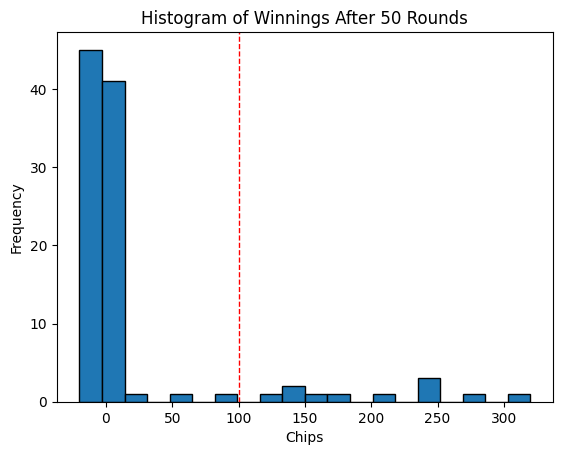

In [55]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Assuming the previous code has been defined here...

def run_multiple_games(num_games=100, rounds_per_game=50):
    winnings_list = []

    for _ in range(num_games):
        game = BlackjackGameWithCounter(num_decks=1, num_dealers=3, counter_threshold=-2)
        game.play_game(total_rounds=rounds_per_game)  # Play 50 rounds
        winnings_list.append(game.player_chips)

    return winnings_list

def analyze_winnings(winnings):
    winnings_array = np.array(winnings)
    average_winnings = np.mean(winnings_array)
    std_deviation = np.std(winnings_array)
    probability_of_winning = np.sum(winnings_array > 100) / len(winnings_array)  # Assuming starting with 100 chips
    probability_of_losing = np.sum(winnings_array < 100) / len(winnings_array)

    return average_winnings, std_deviation, probability_of_winning, probability_of_losing

def plot_histogram(winnings):
    plt.hist(winnings, bins=20, edgecolor='black')
    plt.title("Histogram of Winnings After 50 Rounds")
    plt.xlabel("Chips")
    plt.ylabel("Frequency")
    plt.axvline(x=100, color='red', linestyle='dashed', linewidth=1)  # Starting point
    plt.show()

# Run the multiple games
winnings_list = run_multiple_games(num_games=100, rounds_per_game=50)

# Analyze the winnings
average_winnings, std_deviation, probability_of_winning, probability_of_losing = analyze_winnings(winnings_list)

# Output results
print(f"Average winnings per game: {average_winnings:.2f} chips")
print(f"Standard deviation of winnings: {std_deviation:.2f} chips")
print(f"Probability of net winning: {probability_of_winning:.2f}")
print(f"Probability of net losing: {probability_of_losing:.2f}")

# Plot the histogram of winnings
plot_histogram(winnings_list)


9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings. 